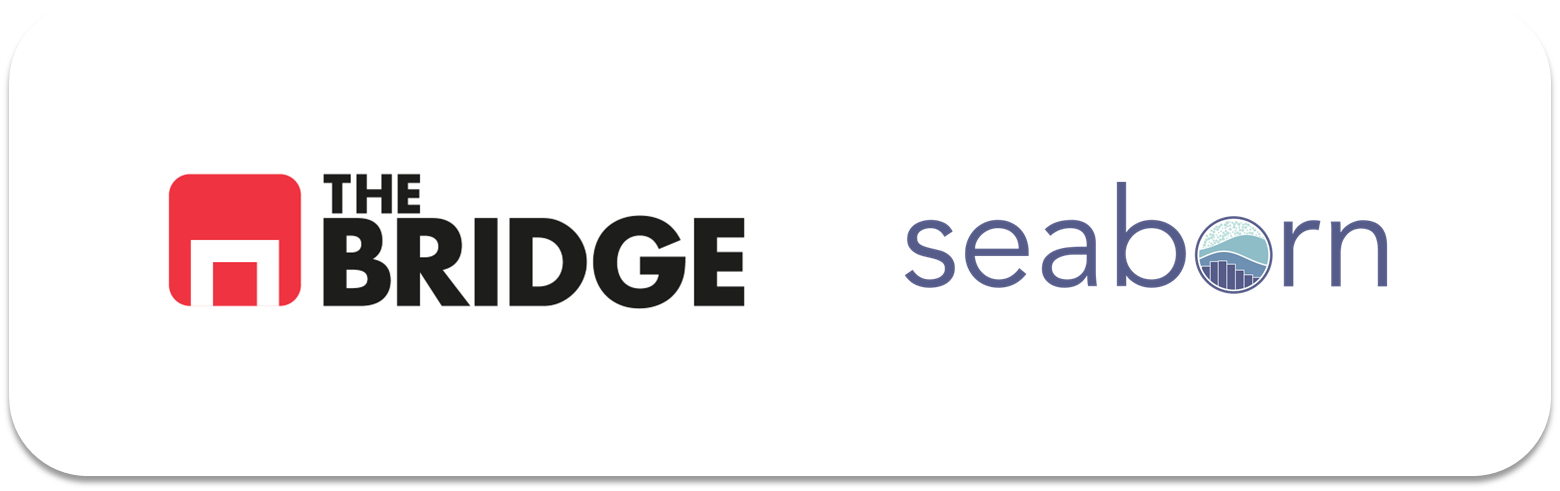

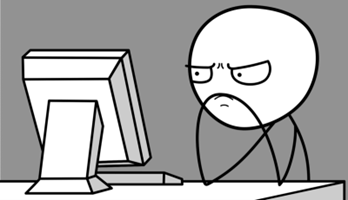

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Ruta completa del archivo BTC.csv
file_path_btc = r"C:\Users\hp\Desktop\Python Scripts\BTC.csv"

# Intentar cargar el archivo especificando la codificación adecuada
try:
    df_btc = pd.read_csv(file_path_btc, encoding="latin1")  # Cambiar a la codificación correcta si es necesario
    print("Primeros registros del archivo BTC.csv:")
    print(df_btc.head())
except UnicodeDecodeError as e:
    print(f"Error al cargar el archivo BTC.csv: {e}")

# Ruta completa del archivo dataset_viajes_jul23.csv
file_path_viajes = r"C:\Users\hp\Desktop\Python Scripts\dataset_viajes_jul23.csv"

try:
    df_viajes = pd.read_csv(file_path_viajes, encoding="latin1")  # Cambiar a la codificación correcta si es necesario
    print("\nPrimeros registros del archivo dataset_viajes_jul23.csv:")
    print(df_viajes.head())
except UnicodeDecodeError as e:
    print(f"Error al cargar el archivo dataset_viajes_jul23.csv: {e}")

# Ruta completa del archivo titanic.csv
file_path_titanic = r"C:\Users\hp\Desktop\Python Scripts\titanic.csv"

try:
    df_titanic = pd.read_csv(file_path_titanic, encoding="latin1")  # Cambiar a la codificación correcta si es necesario
    print("\nPrimeros registros del archivo titanic.csv:")
    print(df_titanic.head())
except UnicodeDecodeError as e:
    print(f"Error al cargar el archivo titanic.csv: {e}")

Primeros registros del archivo BTC.csv:
  unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0  1646092800,2022-03-01 00:00:00,BTC/USD,43221.7...        
1  1646006400,2022-02-28 00:00:00,BTC/USD,37717.1...        
2  1645920000,2022-02-27 00:00:00,BTC/USD,39146.6...        
3  1645833600,2022-02-26 00:00:00,BTC/USD,39242.6...        
4  1645747200,2022-02-25 00:00:00,BTC/USD,38360.9...        

Primeros registros del archivo dataset_viajes_jul23.csv:
  aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0  PamPangea,Nueva York,Londres,5566,Airbus A320,...                                            
1  TabarAir,Cincinnati,Los Angeles,3073,Airbus A3...                                            
2  FlyQ,Barcelona,Roma,859,Boeing 747,False,9248....                                            
3  PamPangea,Ginebra,Bali,12383,Boeing 747,False,...                                            
4  MoldaviAir,Cádiz,Bali,12798,Airbus A380,False,..

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [6]:
# Confirmar las columnas del DataFrame
print("Columnas disponibles en df_btc:")
print(df_btc.columns)

# Verificar si existe la columna "date" o identificar su nombre real
if "date" not in df_btc.columns:
    print("\nLa columna 'date' no existe. Verifica el nombre exacto de las columnas.")
else:
    # Convertir la columna "date" al formato datetime
    df_btc["date"] = pd.to_datetime(df_btc["date"])

    # Establecer la columna "date" como índice
    df_btc.set_index("date", inplace=True)

    # Ver las primeras filas para confirmar los cambios
    print("\nPrimeras filas del DataFrame después de establecer el índice:")
    print(df_btc.head())

Columnas disponibles en df_btc:
Index(['unix,date,symbol,open,high,low,close,Volume BTC,Volume USD'], dtype='object')

La columna 'date' no existe. Verifica el nombre exacto de las columnas.


In [11]:
# Ruta del archivo CSV
file_path = r"C:\Users\hp\Desktop\Python Scripts\BTC.csv"

# Cargar el archivo CSV especificando un delimitador adecuado
df_btc = pd.read_csv(file_path, delimiter=',')

# Si las columnas aún están combinadas, intentar con otro delimitador
if len(df_btc.columns) == 1:  # Todas las columnas están combinadas
    print("Las columnas no se separaron correctamente. Intentando con otro delimitador...")
    df_btc = pd.read_csv(file_path, delimiter=';')  # Cambiar a punto y coma

# Dividir las columnas manualmente si sigue sin separarse correctamente
if len(df_btc.columns) == 1:
    print("Las columnas aún no se separan. Intentando dividirlas manualmente...")
    df_btc = df_btc.iloc[:, 0].str.split(',', expand=True)
    df_btc.columns = ['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD']

# Verificar si la columna "date" existe
if "date" in df_btc.columns:
    # Convertir la columna "date" al formato datetime
    df_btc["date"] = pd.to_datetime(df_btc["date"], errors="coerce")

    # Establecer la columna "date" como índice
    df_btc.set_index("date", inplace=True)

    # Mostrar las primeras filas del DataFrame procesado
    print("\nPrimeras filas del DataFrame procesado:")
    print(df_btc.head())
else:
    print("\nLa columna 'date' no se encuentra en el DataFrame. Verifica el formato del archivo.")

Las columnas no se separaron correctamente. Intentando con otro delimitador...
Las columnas aún no se separan. Intentando dividirlas manualmente...

Primeras filas del DataFrame procesado:
                  unix   symbol      open      high       low     close  \
date                                                                      
2022-03-01  1646092800  BTC/USD  43221.71  43626.49  43185.48  43185.48   
2022-02-28  1646006400  BTC/USD  37717.10  44256.08  37468.99  43178.98   
2022-02-27  1645920000  BTC/USD  39146.66  39886.92  37015.74  37712.68   
2022-02-26  1645833600  BTC/USD  39242.64  40330.99  38600.00  39146.66   
2022-02-25  1645747200  BTC/USD  38360.93  39727.97  38027.61  39231.64   

               Volume BTC          Volume USD  
date                                           
2022-03-01    49.00628870  2116360.1005280763  
2022-02-28  3160.61807044  136472264.45116735  
2022-02-27  1701.81704307   64180081.56384513  
2022-02-26   912.72408690   35730099.50368476

In [12]:
# Verificar si la columna "date" ya está en el índice
if "date" not in df_btc.index.names:  # Si no está como índice
    # Convertir la columna "date" al formato datetime
    df_btc["date"] = pd.to_datetime(df_btc["date"], errors="coerce")
    
    # Establecer la columna "date" como índice
    df_btc.set_index("date", inplace=True)

# Verificar que el índice sea de tipo datetime
if not pd.api.types.is_datetime64_any_dtype(df_btc.index):
    df_btc.index = pd.to_datetime(df_btc.index, errors="coerce")

# Mostrar las primeras filas del DataFrame procesado
print("Primeras filas del DataFrame después de establecer el índice:")
print(df_btc.head())


Primeras filas del DataFrame después de establecer el índice:
                  unix   symbol      open      high       low     close  \
date                                                                      
2022-03-01  1646092800  BTC/USD  43221.71  43626.49  43185.48  43185.48   
2022-02-28  1646006400  BTC/USD  37717.10  44256.08  37468.99  43178.98   
2022-02-27  1645920000  BTC/USD  39146.66  39886.92  37015.74  37712.68   
2022-02-26  1645833600  BTC/USD  39242.64  40330.99  38600.00  39146.66   
2022-02-25  1645747200  BTC/USD  38360.93  39727.97  38027.61  39231.64   

               Volume BTC          Volume USD  
date                                           
2022-03-01    49.00628870  2116360.1005280763  
2022-02-28  3160.61807044  136472264.45116735  
2022-02-27  1701.81704307   64180081.56384513  
2022-02-26   912.72408690   35730099.50368476  
2022-02-25  2202.85182731   86421489.86236808  


### Ejercicio 2

Crea una función a la que puedas pasar como argumentos un dataframe y una lista de columnas categóricas y dibuje una matriz de gráficas de 2 columnas y tantas filas como necesite para pintar el diagrama de barras de las frecuencias absolutas de las columnas pasadas como argumento. No hace falta que compruebes que las columnas son categóricas. Y que ponga como título de cada figura "Frecuencias Absolutas de \<nombre de la columna>\. Utiliza Seaborn para dibujar las gráficas y matplotlib para lo que necesites (pero no para dibujar las gráficas)

In [ ]:
import math

def plot_categorical_frequencies(dataframe, categorical_columns):
    """
    Función para dibujar diagramas de barras de frecuencias absolutas 
    para columnas categóricas en un DataFrame.

    Args:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    categorical_columns (list): Lista de nombres de columnas categóricas.
    """
    # Número de columnas por fila
    cols = 2
    
    # Número total de filas necesarias
    rows = math.ceil(len(categorical_columns) / cols)
    
    # Crear la figura y los ejes
    fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 5), constrained_layout=True)
    
    # Asegurar que axes sea un array bidimensional
    axes = axes.flatten() if len(categorical_columns) > 1 else [axes]
    
    # Dibujar cada gráfica en los ejes correspondientes
    for i, column in enumerate(categorical_columns):
        sns.countplot(data=dataframe, x=column, ax=axes[i])
        axes[i].set_title(f"Frecuencias Absolutas de {column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Frecuencia")
    
    # Ocultar ejes vacíos (si hay más espacios que gráficas)
    for j in range(len(categorical_columns), len(axes)):
        axes[j].axis('off')
    
    # Mostrar la figura
    plt.show()





### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


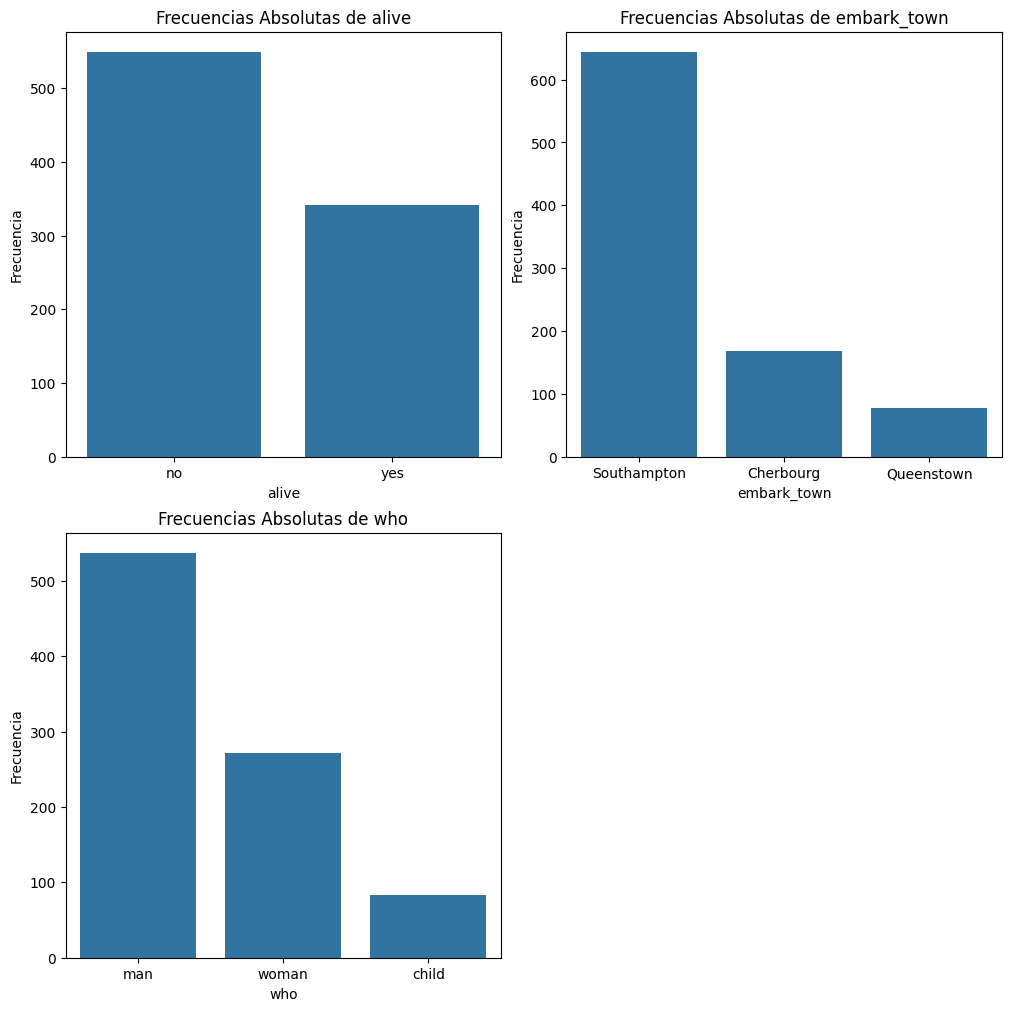

In [15]:
# Variables categóricas seleccionadas
categorical_columns = ['alive', 'embark_town', 'who']

# Llamar a la función creada anteriormente para pintar las gráficas
plot_categorical_frequencies(df_titanic, categorical_columns)

### Ejercicio 4

Crea una función similar a la del ejercicio 4, pero que esta vez pinte el histograma de una lista de columnas numéricas, añade un argumento para poder indicar el número de bins. Añade también un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada grafica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [16]:
def plot_numerical_histograms(dataframe, numerical_columns, bins=10, kde=False):
    """
    Función para dibujar histogramas de columnas numéricas en un DataFrame.

    Args:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    numerical_columns (list): Lista de nombres de columnas numéricas.
    bins (int): Número de bins para los histogramas.
    kde (bool): Si se incluye o no la función de densidad.
    """
    # Número de columnas por fila
    cols = 2
    
    # Número total de filas necesarias
    rows = math.ceil(len(numerical_columns) / cols)
    
    # Crear la figura y los ejes
    fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 5), constrained_layout=True)
    
    # Asegurar que axes sea un array bidimensional
    axes = axes.flatten() if len(numerical_columns) > 1 else [axes]
    
    # Dibujar cada gráfica en los ejes correspondientes
    for i, column in enumerate(numerical_columns):
        sns.histplot(data=dataframe, x=column, bins=bins, kde=kde, ax=axes[i])
        axes[i].set_title(f"Histograma de {column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Frecuencia")
    
    # Ocultar ejes vacíos (si hay más espacios que gráficas)
    for j in range(len(numerical_columns), len(axes)):
        axes[j].axis('off')
    
    # Mostrar la figura
    plt.show()


### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

Primera línea del archivo (verificar delimitador):
"aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes"

Columnas no separadas correctamente. Intentando dividirlas manualmente...
Columnas disponibles en el DataFrame después de corrección:
Index(['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala',
       'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes'],
      dtype='object')

Verificando columnas seleccionadas:
La columna 'ingresos' está lista para graficar.
La columna 'consumo_kg' está lista para graficar.
La columna 'duracion' está lista para graficar.

Histograma con 10 bins:


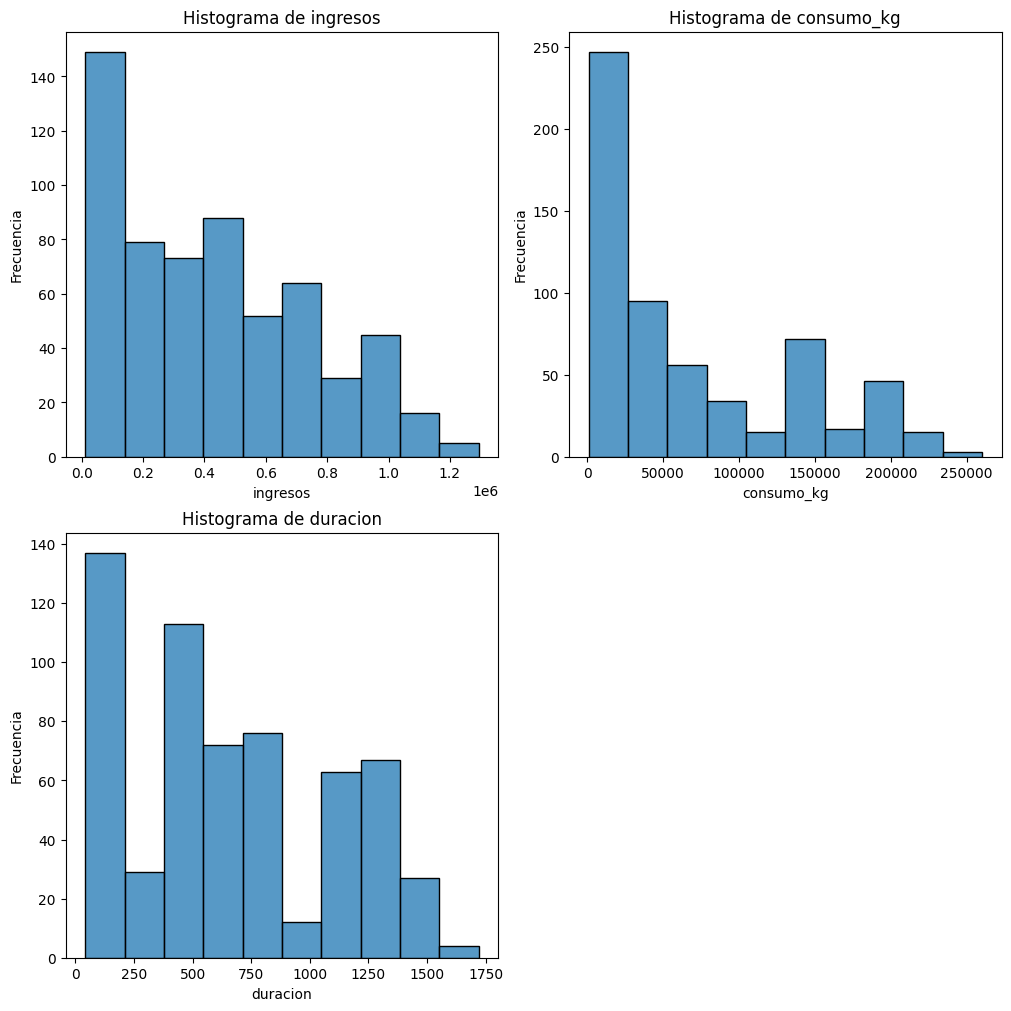


Histograma con 30 bins:


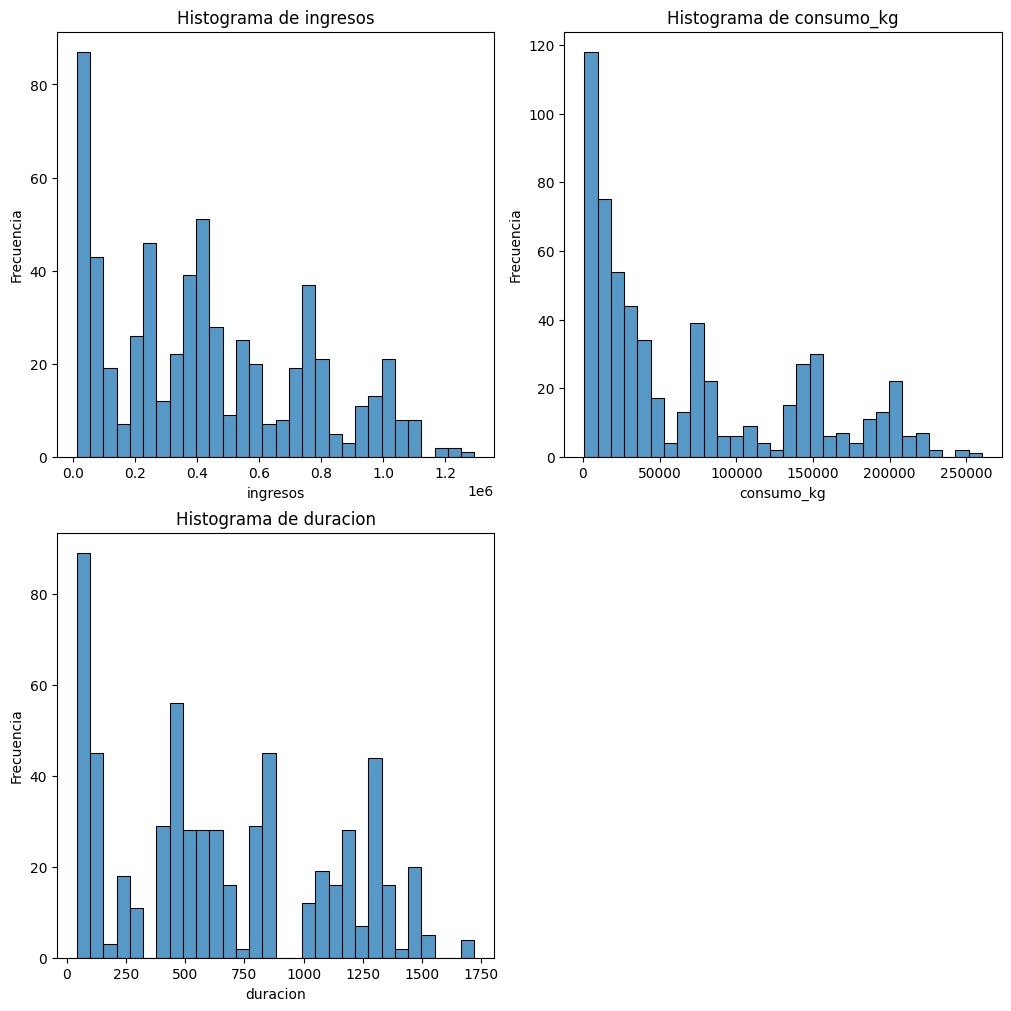


Histograma con 60 bins:


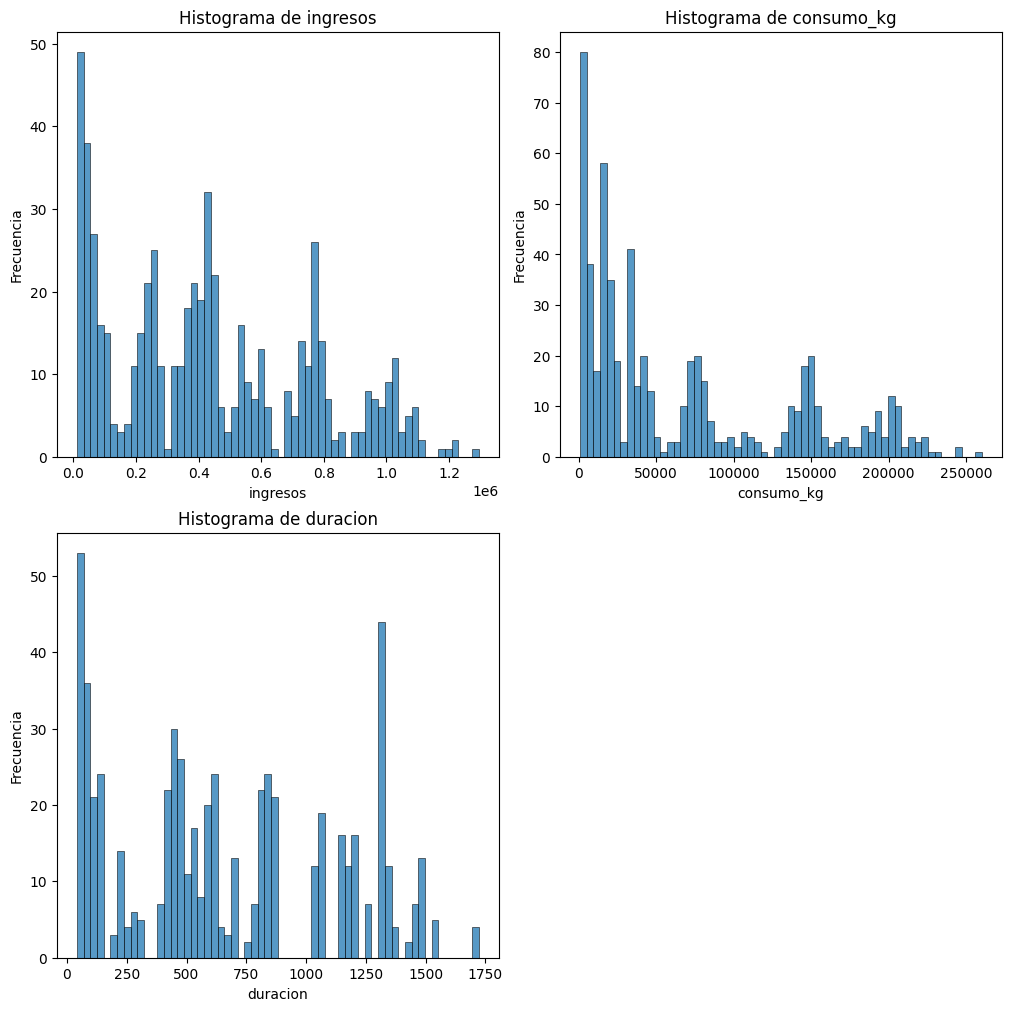

In [22]:
# Ruta del archivo CSV
file_path = r"C:\Users\hp\Desktop\Python Scripts\dataset_viajes_jul23.csv"

# Cargar el archivo como texto crudo y verificar delimitador
with open(file_path, 'r', encoding='latin1') as file:
    raw_data = file.readline()
    print("Primera línea del archivo (verificar delimitador):")
    print(raw_data)

# Cargar el archivo con un delimitador correcto
df_viajes = pd.read_csv(file_path, delimiter=',', encoding='latin1')  # Si sigue sin funcionar, intenta cambiar ',' a ';'

# Forzar separación manual si las columnas siguen combinadas
if len(df_viajes.columns) == 1:
    print("Columnas no separadas correctamente. Intentando dividirlas manualmente...")
    df_viajes = df_viajes.iloc[:, 0].str.split(',', expand=True)
    df_viajes.columns = ['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala', 
                         'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes']

# Verificar las columnas disponibles
print("Columnas disponibles en el DataFrame después de corrección:")
print(df_viajes.columns)

# Convertir las columnas numéricas a tipo numérico (por si contienen caracteres erróneos)
num_cols = ["ingresos", "consumo_kg", "duracion"]
df_viajes[num_cols] = df_viajes[num_cols].apply(pd.to_numeric, errors='coerce')

# Verificar que las columnas seleccionadas existan
numerical_columns = ["ingresos", "consumo_kg", "duracion"]
print("\nVerificando columnas seleccionadas:")
for col in numerical_columns:
    if col not in df_viajes.columns:
        print(f"Advertencia: La columna '{col}' no existe en el DataFrame.")
    else:
        print(f"La columna '{col}' está lista para graficar.")

# Lista de bins para los histogramas
bins_list = [10, 30, 60]

# Definir la función para graficar histogramas
def plot_numerical_histograms(dataframe, numerical_columns, bins=10, kde=False):
    import math
    # Número de columnas por fila
    cols = 2
    
    # Número total de filas necesarias
    rows = math.ceil(len(numerical_columns) / cols)
    
    # Crear la figura y los ejes
    fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 5), constrained_layout=True)
    
    # Asegurar que axes sea un array bidimensional
    axes = axes.flatten() if len(numerical_columns) > 1 else [axes]
    
    # Dibujar cada gráfica en los ejes correspondientes
    for i, column in enumerate(numerical_columns):
        sns.histplot(data=dataframe, x=column, bins=bins, kde=kde, ax=axes[i])
        axes[i].set_title(f"Histograma de {column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Frecuencia")
    
    # Ocultar ejes vacíos (si hay más espacios que gráficas)
    for j in range(len(numerical_columns), len(axes)):
        axes[j].axis('off')
    
    # Mostrar la figura
    plt.show()

# Iterar sobre los bins y aplicar la función de histogramas
for bins in bins_list:
    print(f"\nHistograma con {bins} bins:")
    plot_numerical_histograms(df_viajes, numerical_columns, bins=bins, kde=False)

### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son series temporales o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

In [23]:

def plot_time_series(dataframe, numerical_columns):
    """
    Función para graficar series temporales o secuencias numéricas en un DataFrame.

    Args:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    numerical_columns (list): Lista de nombres de columnas numéricas que representan series temporales o secuencias.
    """
    # Número de columnas por fila
    cols = 2

    # Número total de filas necesarias
    rows = math.ceil(len(numerical_columns) / cols)

    # Crear la figura y los ejes
    fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 5), constrained_layout=True)

    # Asegurar que axes sea un array bidimensional
    axes = axes.flatten() if len(numerical_columns) > 1 else [axes]

    # Dibujar cada gráfica en los ejes correspondientes
    for i, column in enumerate(numerical_columns):
        axes[i].plot(dataframe.index, dataframe[column], marker='o', linestyle='-')
        axes[i].set_title(f"Serie de Tiempo: {column}")
        axes[i].set_xlabel("Índice")
        axes[i].set_ylabel(column)

    # Ocultar ejes vacíos (si hay más espacios que gráficas)
    for j in range(len(numerical_columns), len(axes)):
        axes[j].axis('off')

    # Mostrar la figura
    plt.show()

### Ejercicio 7

Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

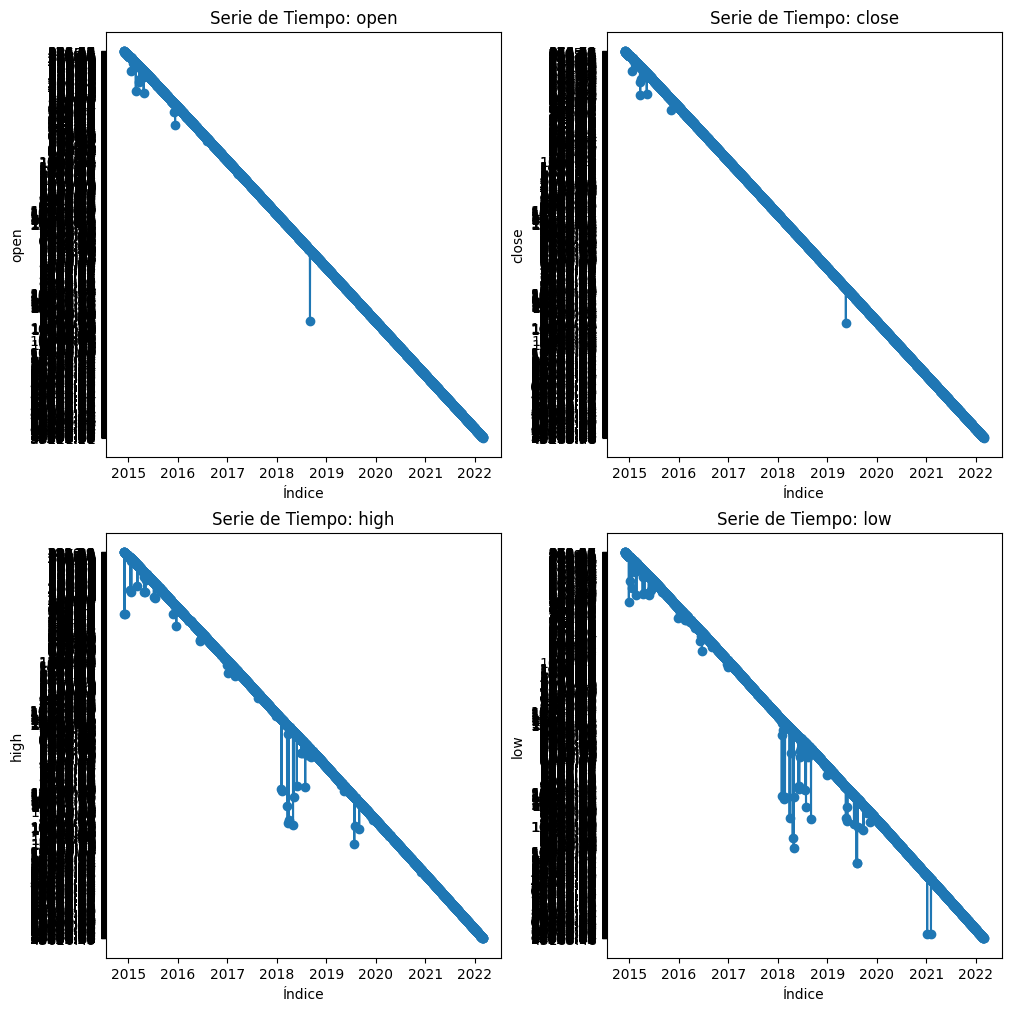

In [24]:
# Lista de columnas a graficar
numerical_columns = ['open', 'close', 'high', 'low']

# Llamar a la función para graficar las columnas como series temporales
plot_time_series(df_btc, numerical_columns)


### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda. El segundo debe permitir colocar una fecha de inicio y el tercero una fecha de fin. Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supon que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

In [25]:
def plot_time_series(dataframe, numerical_columns, combined=False, start_date=None, end_date=None):
    """
    Función para graficar series temporales o secuencias numéricas en un DataFrame.

    Args:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    numerical_columns (list): Lista de nombres de columnas numéricas que representan series temporales o secuencias.
    combined (bool): Si es True, pinta una sola gráfica con todas las líneas de evolución juntas y añade una leyenda.
    start_date (str): Fecha de inicio en formato 'YYYY-MM-DD'. Si es None, incluye desde el inicio.
    end_date (str): Fecha de fin en formato 'YYYY-MM-DD'. Si es None, incluye hasta el final.
    """
    # Filtrar el DataFrame por rango de fechas si se especifica
    if start_date or end_date:
        dataframe = dataframe.loc[start_date:end_date]

    if combined:
        # Pinta todas las columnas juntas en una sola gráfica
        plt.figure(figsize=(10, 6))
        for column in numerical_columns:
            sns.lineplot(data=dataframe, x=dataframe.index, y=column, label=column)
        plt.title("Evolución Combinada")
        plt.xlabel("Fecha")
        plt.ylabel("Valores")
        plt.legend()
        plt.show()
    else:
        # Número de columnas por fila
        cols = 2
        rows = math.ceil(len(numerical_columns) / cols)

        # Crear la figura y los ejes
        fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 5), constrained_layout=True)

        # Asegurar que axes sea un array bidimensional
        axes = axes.flatten() if len(numerical_columns) > 1 else [axes]

        # Dibujar cada gráfica en los ejes correspondientes
        for i, column in enumerate(numerical_columns):
            sns.lineplot(data=dataframe, x=dataframe.index, y=column, ax=axes[i])
            axes[i].set_title(f"Serie de Tiempo: {column}")
            axes[i].set_xlabel("Fecha")
            axes[i].set_ylabel(column)

        # Ocultar ejes vacíos (si hay más espacios que gráficas)
        for j in range(len(numerical_columns), len(axes)):
            axes[j].axis('off')

        # Mostrar la figura
        plt.show()


### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.

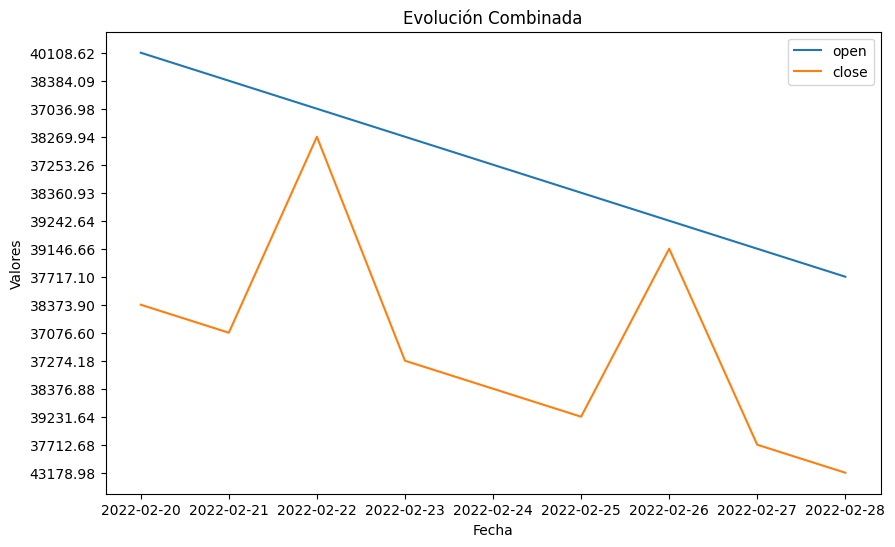

In [27]:
# Asegurarse de que la columna 'date' esté en formato datetime y sea el índice
if 'date' in df_btc.columns:
    df_btc['date'] = pd.to_datetime(df_btc['date'], errors='coerce')
    df_btc.set_index('date', inplace=True)

# Ordenar el índice por fecha (si no está ya ordenado)
df_btc.sort_index(inplace=True)

# Definir el rango de fechas para el período más interesante
start_date = "2022-02-20"  # Fecha de inicio
end_date = "2022-02-28"    # Fecha de fin

# Llamar a la función para graficar las columnas open y close en el período definido
plot_time_series(
    dataframe=df_btc,
    numerical_columns=['open', 'close'],
    combined=True,  # Graficar de forma conjunta
    start_date=start_date,
    end_date=end_date
)